In [1]:
%load_ext zipline
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [41]:
from zipline.utils import factory
from zipline.api import symbol, order, record
import numpy as np
from datetime import datetime
import pytz
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import os
import collections
from StringIO import StringIO

dictData = collections.OrderedDict()

parse = lambda x: datetime.strptime(x, '%d-%m-%y').date()

dict={}
array = ['DOGEBTC','MAIDBTC','DASHBTC','LTCUSD','XRPUSD','BTCETH','BTSBTC','XMRBTC','BTCUSD','FCTBTC']

for x in array:
    dict["{0}".format(x)] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/'+x+'.csv', index_col=['Timestamp'], 
                                  usecols=['Timestamp','Open','High','Low','Close','Volume'], sep=';',
                                  parse_dates=True, date_parser=parse)

dictData = dict
# dogebtc = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/DOGEBTC.csv', index_col=['Timestamp'], 
#                                   usecols=['Timestamp','Open','High','Low','Close','Volume'], sep=';',
#                                   parse_dates=True, date_parser=parse)





# dictData['DOGEBTC'] = dogebtc

# dictData['MAIDBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/MAIDBTC.csv', index_col=['Timestamp'], usecols=['Timestamp','Open','High','Low','Close','Volume','VWAP','TWAP'], sep=';')
# dictData['DASHBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/DASHBTC.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['LTCUSD'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/LTCUSD.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['XRPUSD'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/XRPUSD.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['BTCETH'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/BTCETH.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['BTSBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/BTSBTC.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['XMRBTC'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/XMRBTC.csv', parse_dates=True, index_col=False, date_parser=parse, sep=';')
# dictData['BTCUSD'] = pd.read_csv('/Users/JH/Desktop/Business/GGSB Thesis 2016/Code/excelled data/BTCUSD.csv', index_col=['Timestamp'], usecols=['Timestamp','Open','High','Low','Close','Volume','VWAP','TWAP'], sep=';')
# print(dictData['DOGEBTC'])

In [42]:
panel = pd.Panel(dictData)
panel.minor_axis = ['open', 'high', 'low', 'close', 'volume']
print(panel)
print(panel.minor_axis)
print(panel['DOGEBTC'])

<class 'pandas.core.panel.Panel'>
Dimensions: 10 (items) x 803 (major_axis) x 5 (minor_axis)
Items axis: BTCETH to XRPUSD
Major_axis axis: 2014-04-01 00:00:00 to 2016-06-11 00:00:00
Minor_axis axis: open to volume
Index([u'open', u'high', u'low', u'close', u'volume'], dtype='object')
                open      high       low     close         volume
Timestamp                                                        
2014-04-01  0.000570  0.000584  0.000558  0.000565   264147.21430
2014-04-02  0.000562  0.000575  0.000461  0.000468   334533.40500
2014-04-03  0.000468  0.000483  0.000410  0.000483   439332.31670
2014-04-04  0.000483  0.000504  0.000342  0.000482   285268.15880
2014-04-05  0.000483  0.000485  0.000068  0.000481   252173.91660
2014-04-06  0.000481  0.000491  0.000455  0.000468   208399.63040
2014-04-07  0.000470  0.000482  0.000456  0.000475   363096.95550
2014-04-08  0.000471  0.000677  0.000446  0.000459   280283.02690
2014-04-09  0.000461  0.000474  0.000441  0.000454   25

In [43]:
sim_params = factory.create_simulation_parameters(
    start=pd.to_datetime("01-04-14", dayfirst=True).tz_localize("Europe/London").tz_convert("UTC"),
    end=pd.to_datetime("11-06-16", dayfirst=True).tz_localize("Europe/London").tz_convert("UTC"),
    data_frequency="daily",
    emission_rate="daily")

#data = data.dropna()

In [44]:
from zipline.algorithm import TradingAlgorithm
from zipline.api import order, symbol

import matplotlib.pyplot as plt

def initialize(algo):
    pass

# This will be the ETF trading 'strategy'
def handle_data(algo, data):
    order(symbol('DOGEBTC'), 100000000)


algo_obj = TradingAlgorithm(initialize=initialize, handle_data=handle_data, sim_params=sim_params)
perf_manual = algo_obj.run(data=panel, overwrite_sim_params=False)


#def analyze(algo, perf_manual):







 
 
# ax2 = plt.subplot(212, sharex=ax1)
# perf_manual.DOGEBTC.plot(ax=ax2)
# 
# 
# plt.gcf().set_size_inches(18, 8)
# plt.show()

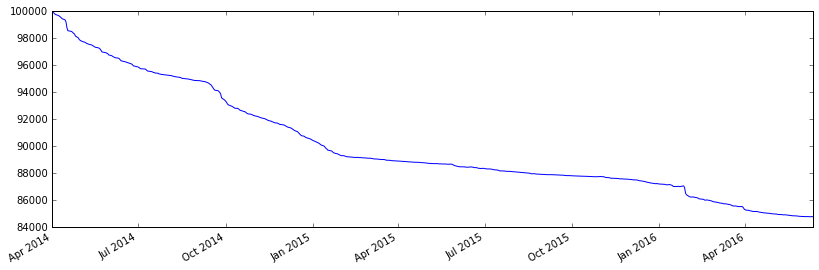

In [45]:
# This works fine
# ax1 = plt.subplot(621)
# del dogebtc['Volume']
# dogebtc.plot(ax=ax1)
# plt.ylabel('price')
# # ax1.lines.pop(4)
# plt.setp(ax1.get_xticklabels(), visible=True)

# Portfolio value
ax1 = plt.subplot(621)
perf_manual.portfolio_value.plot(ax=ax1)

plt.gcf().set_size_inches(30,30)
plt.show()